<a href="https://colab.research.google.com/github/Denis060/house-price-prediction/blob/main/Assignment_2_Ibrahim_Denis_fofanah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd


In [23]:
file_path = "/content/drive/MyDrive/Colab Notebooks/data_assignment2.csv"
data = pd.read_csv(file_path, delimiter=';')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,"313000,0","3,0","1,5",1340,7912,"1,5",0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,"2384000,0","5,0","2,5",3650,9050,"2,0",0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,"342000,0","3,0","2,0",1930,11947,"1,0",0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,"420000,0","3,0","2,25",2000,8030,"1,0",0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,"550000,0","4,0","2,5",1940,10500,"1,0",0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [24]:
colums_to_clean=['price','bedrooms','bathrooms','floors']

In [25]:
for column in colums_to_clean:
  data[column] = data[column].str.replace(',','.').astype(float)

In [26]:
data.dtypes

,0
date,object
price,float64
bedrooms,float64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

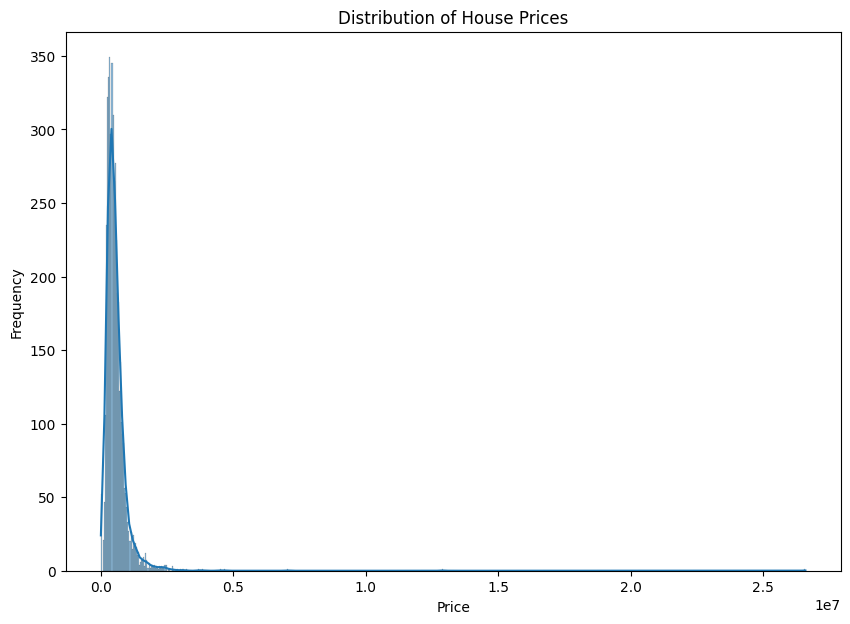

In [28]:
plt.figure(figsize=(10,7))
sns.histplot(data['price'],kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

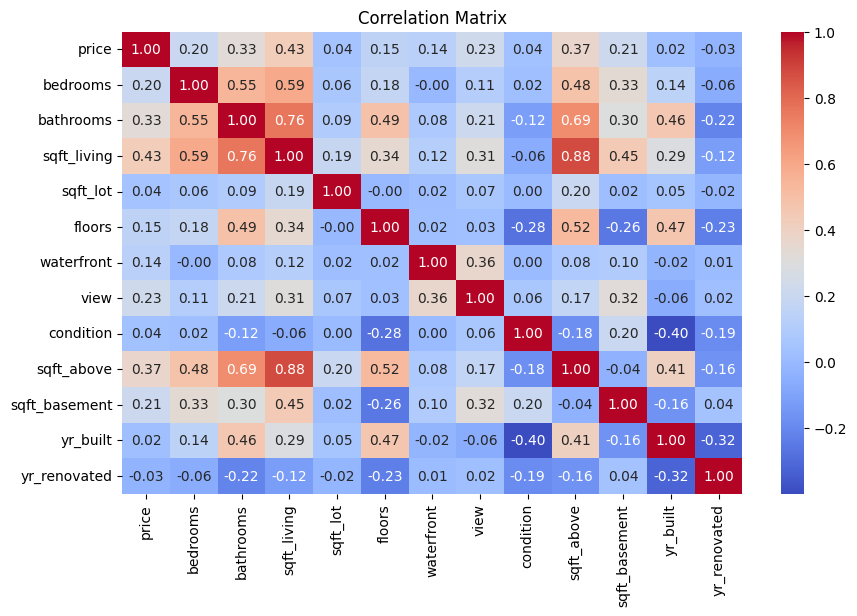

In [29]:
# Convert 'date' column to datetime objects
data['date'] = pd.to_datetime(data['date'])

# Extracting numerical features for correlation
numerical_features = data.select_dtypes(include=['number'])

# Calculate correlation matrix on numerical features only
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
#importing train_test_split
from sklearn.model_selection import train_test_split


In [21]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
#importing three models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [40]:
#Selecting features and target
X=data[['sqft_living','bathrooms',"yr_built","bedrooms"]]
y=data['price']

In [41]:
X.head()

,sqft_living,bathrooms,yr_built,bedrooms
0,1340,1.50,1955,3.0
1,3650,2.50,1921,5.0
2,1930,2.00,1966,3.0
3,2000,2.25,1963,3.0
4,1940,2.50,1976,4.0


In [42]:
#Scaling the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [45]:
#Splkiting the dataset into train of 80% and test set 0f 20%
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [47]:
#storing and fiting the model
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor()

}

# List to store results as dictionaries
results_list = []  # an empty list to hold individual result dictionaries

# Loop through models, train, predict, and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Append results as a dictionary to the list
    results_list.append({"Model": model_name, "MSE": mse, "R-squared": r2})

# Create the DataFrame to store the result of the Dictionary used
results = pd.DataFrame(results_list)

# Display the results
results.sort_values(by="R-squared", ascending=False, inplace=True)

In [48]:
print("Validation of the models used are :")
results

Validation of the models used are :


,Model,MSE,R-squared
0,Linear Regression,9.887149e+11,0.030526
1,Random Forest,1.003095e+12,0.016425
2,Decision Tree,1.046672e+12,-0.026303


**USER REQUIREMENT** **AND** **SOLUTION**

**Requirement** : To predict House prices using key property features

**Solution** To achieve this, I tested three different models—Linear Regression, Random Forest, and Decision Tree—using key features like sqft_living, bathrooms, bedrooms, and yr_built. I trained each model and evaluated how well they could predict house prices.

After comparing all three models, Linear Regression turned out to be the best choice. It had the highest R² value (3.05%) and the lowest Mean Squared Error (MSE) among the models. Although it wasn’t a perfect solution, it performed slightly better than the other models, capturing a small portion of the variation in house prices.


**Conclusion:**

From this analysis, we see that Linear Regression is the most reliable model for this dataset—but it’s far from ideal. The low R² value tells us that there are many other factors affecting house prices that we haven’t captured here, meaning the model’s predictions are only somewhat accurate.
